In [2]:
import pandas as pd
from pathlib import Path

path = Path("../data/gtsrb/labels.csv")
df = pd.read_csv(path, sep=";")
df.head()

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,00000.ppm,53,54,6,5,48,49,16
1,00001.ppm,42,45,5,5,36,40,1
2,00002.ppm,48,52,6,6,43,47,38
3,00003.ppm,27,29,5,5,22,24,33
4,00004.ppm,60,57,5,5,55,52,11


In [3]:
for key in df.keys():
    print(key, end=", ")

Filename, Width, Height, Roi.X1, Roi.Y1, Roi.X2, Roi.Y2, ClassId, 

In [4]:
df["Width"].describe()

count    51839.000000
mean        50.755937
std         24.499807
min         25.000000
25%         34.000000
50%         43.000000
75%         58.000000
max        266.000000
Name: Width, dtype: float64

In [5]:
df["Height"].describe()

count    51839.000000
mean        50.337584
std         23.258706
min         25.000000
25%         35.000000
50%         43.000000
75%         58.000000
max        232.000000
Name: Height, dtype: float64

In [6]:
df["ratio"] = df["Width"] / df["Height"]
df["ratio"].describe()

count    51839.000000
mean         1.005629
std          0.073384
min          0.368132
25%          0.970588
50%          1.000000
75%          1.038462
max          1.437500
Name: ratio, dtype: float64

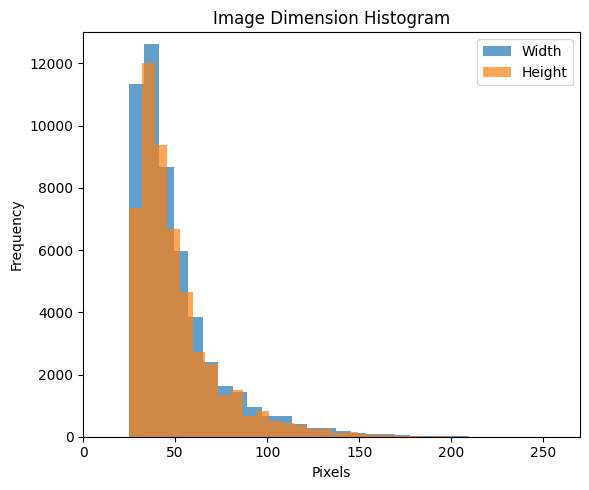

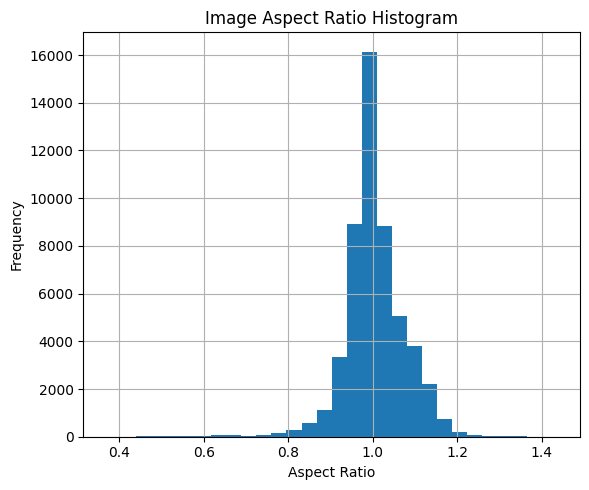

In [7]:
import matplotlib.pyplot as plt

# Combined Width and Height histogram
plt.figure(figsize=(6, 5))
plt.hist(df["Width"], bins=30, alpha=0.7, label="Width")
plt.hist(df["Height"], bins=30, alpha=0.7, label="Height")
plt.title("Image Dimension Histogram")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.ylim(0, 13000)
plt.xlim(0, 270)
plt.legend()
plt.tight_layout()
plt.show()

# Aspect ratio histogram
plt.figure(figsize=(6, 5))
df["ratio"].hist(bins=30)
plt.title("Image Aspect Ratio Histogram")
plt.xlabel("Aspect Ratio")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [8]:
df["roi_x_size"] = df["Roi.X2"] - df["Roi.X1"]
df["roi_y_size"] = df["Roi.Y2"] - df["Roi.Y1"]
df["roi_ratio"] = df["roi_x_size"] / df["roi_y_size"]
df["roi_ratio"].describe()

count    51839.000000
mean         1.006028
std          0.087557
min          0.323944
25%          0.964286
50%          1.000000
75%          1.050000
max          1.437500
Name: roi_ratio, dtype: float64

In [9]:
import numpy as np
from PIL import Image
import os
from tqdm import tqdm

# Directory containing images
image_dir = "../data/gtsrb/images"

# Function to calculate color histogram for an image
def calc_color_histogram(image_path, bins=256):
    img = Image.open(image_path).convert("RGB")
    arr = np.array(img)
    hist_r, _ = np.histogram(arr[:, :, 0], bins=bins, range=(0, 255))
    hist_g, _ = np.histogram(arr[:, :, 1], bins=bins, range=(0, 255))
    hist_b, _ = np.histogram(arr[:, :, 2], bins=bins, range=(0, 255))
    return hist_r, hist_g, hist_b

# List all .ppm files
ppm_files = [f for f in os.listdir(image_dir) if f.endswith('.ppm')]

sum_hist_r = np.zeros(256)
sum_hist_g = np.zeros(256)
sum_hist_b = np.zeros(256)

for fname in tqdm(ppm_files):
    fpath = os.path.join(image_dir, fname)
    hist_r, hist_g, hist_b = calc_color_histogram(fpath)
    sum_hist_r += hist_r
    sum_hist_g += hist_g
    sum_hist_b += hist_b

mean_hist_r = sum_hist_r / len(ppm_files)
mean_hist_g = sum_hist_g / len(ppm_files)
mean_hist_b = sum_hist_b / len(ppm_files)

100%|██████████| 51839/51839 [00:21<00:00, 2386.76it/s]


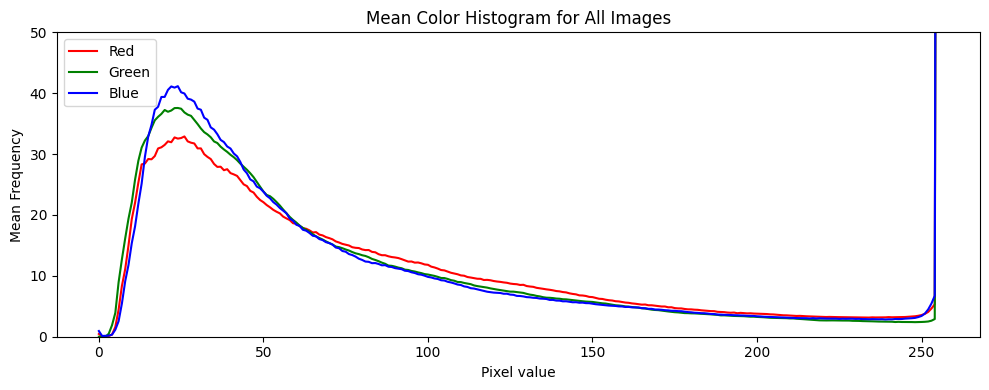

In [10]:
plt.figure(figsize=(10, 4))
plt.plot(mean_hist_r, color='r', label='Red')
plt.plot(mean_hist_g, color='g', label='Green')
plt.plot(mean_hist_b, color='b', label='Blue')
plt.title("Mean Color Histogram for All Images")
plt.xlabel("Pixel value")
plt.ylabel("Mean Frequency")
plt.ylim(0, 50)
plt.legend()
plt.tight_layout()
plt.show()

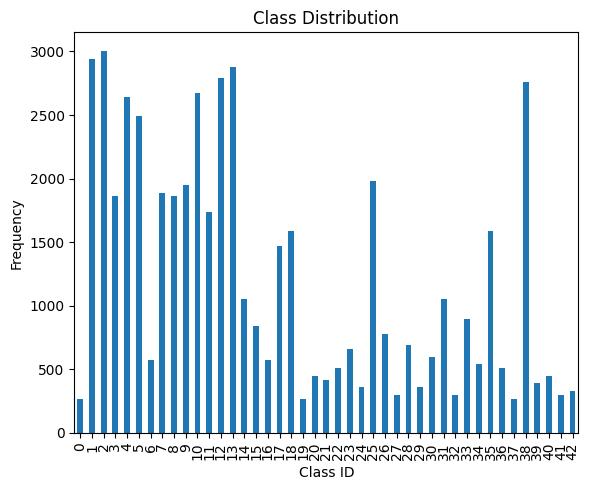

In [11]:
# class balance
plt.figure(figsize=(6, 5))
df["ClassId"].value_counts().sort_index().plot(kind="bar")
plt.title("Class Distribution")
plt.xlabel("Class ID")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [12]:
counts = df["ClassId"].value_counts().sort_index()
max, min, mean = counts.max(), counts.min(), counts.mean()
print("Class Distribution Statistics:")
print(f"Max: {max}, Min: {min}, Mean: {mean:.2f}")

Class Distribution Statistics:
Max: 3000, Min: 270, Mean: 1205.56


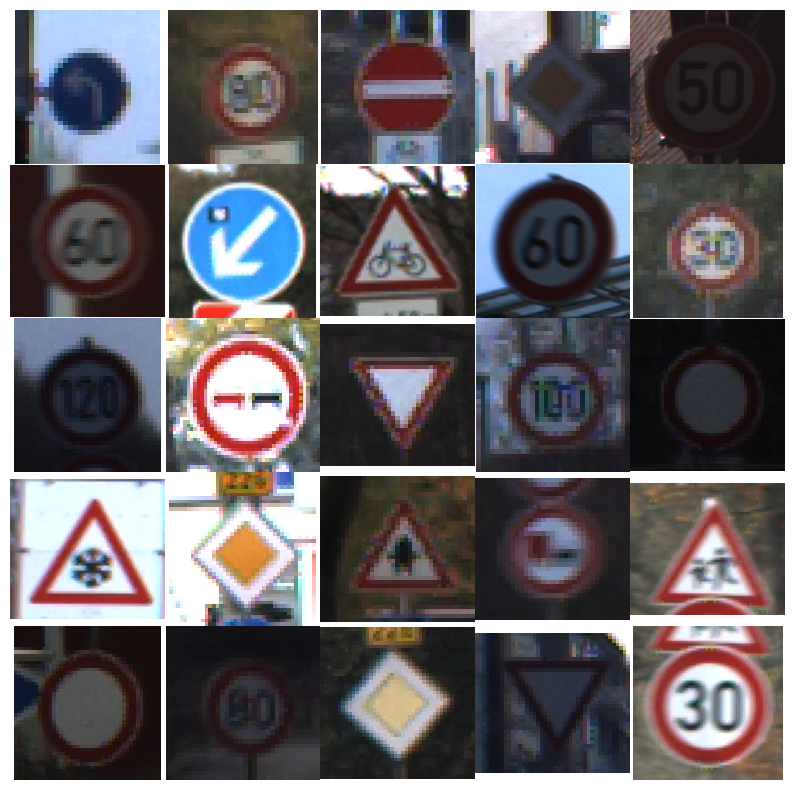

In [31]:
import random

# Select 16 random image filenames
random_files = random.sample(ppm_files, 25)

plt.figure(figsize=(12, 8))
for i, fname in enumerate(random_files):
    img_path = os.path.join(image_dir, fname)
    img = Image.open(img_path)
    plt.subplot(5, 5, i + 1)
    plt.gcf().set_size_inches(10, 10)
    plt.imshow(img)
    plt.axis('off')
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()